In [27]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

In [2]:
dataset_file = 'data/seeds.csv'
df = pd.read_csv(dataset_file)

In [9]:
df.species.unique()

array([0, 1, 2], dtype=int64)

In [10]:
df.head()

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coefficient,groove_length,species
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


In [11]:
features = df[df.columns[0:7]]
features.sample(10)

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coefficient,groove_length
183,11.65,13.07,0.8575,5.108,2.850,5.209,5.135
32,14.09,14.41,0.8529,5.717,3.186,3.920,5.299
69,12.73,13.75,0.8458,5.412,2.882,3.533,5.067
89,20.88,17.05,0.9031,6.450,4.032,5.016,6.321
107,17.63,15.86,0.8800,6.033,3.573,3.747,5.929
50,14.43,14.40,0.8751,5.585,3.272,3.975,5.144
201,12.67,13.32,0.8977,4.984,3.135,2.300,4.745
195,12.80,13.47,0.8860,5.160,3.126,4.873,4.914
100,16.41,15.25,0.8866,5.718,3.525,4.217,5.618
196,12.79,13.53,0.8786,5.224,3.054,5.483,4.958


In [15]:
# For clustering its important to plot the data, this helps visualize the clusters to apply clustering
# However, with 7 dimensions, its difficult to visualize the clusters
# Therefore we apply PCA to redume the dimensionality to help visualize
scaled_features = MinMaxScaler().fit_transform(features[df.columns[0:7]])

pca = PCA(n_components=2).fit(scaled_features)
feature_2d = pca.transform(scaled_features)
feature_2d[0:10]

array([[ 0.07502933,  0.12969116],
       [-0.02430059,  0.36411968],
       [-0.14937464,  0.45649725],
       [-0.18088051,  0.44055742],
       [ 0.25058879,  0.44129658],
       [-0.11363851,  0.36902075],
       [-0.04378114,  0.10966172],
       [-0.13412921,  0.31501281],
       [ 0.43988919,  0.00147033],
       [ 0.35028428,  0.18923482]])

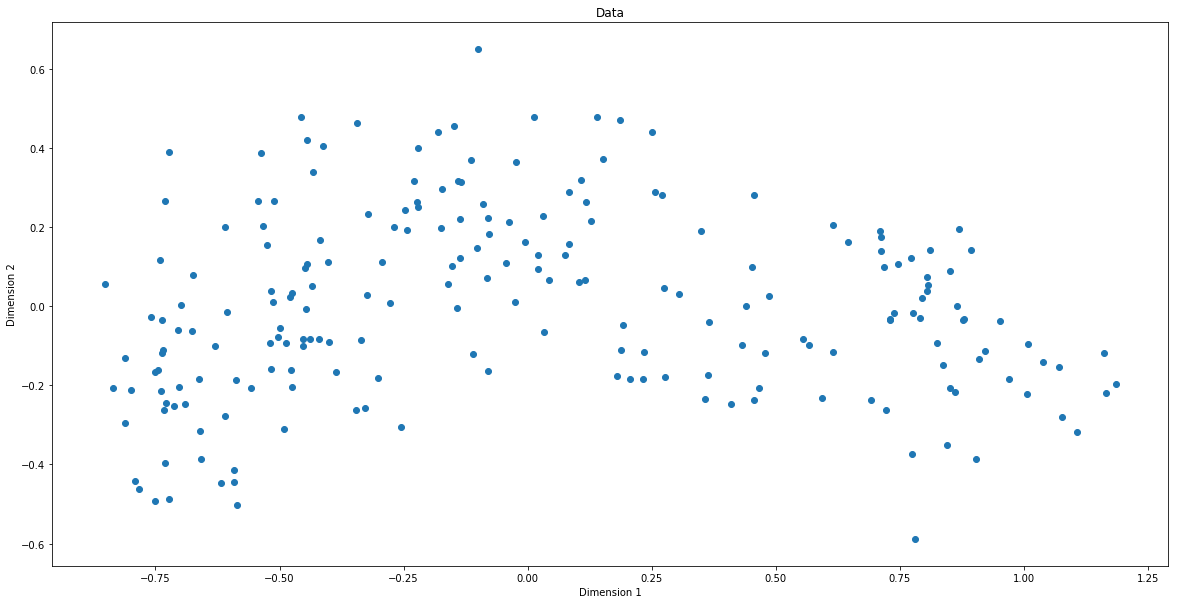

In [18]:
plt.figure(figsize=(20, 10))
plt.scatter(feature_2d[:, 0], feature_2d[:, 1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Data')
plt.show()

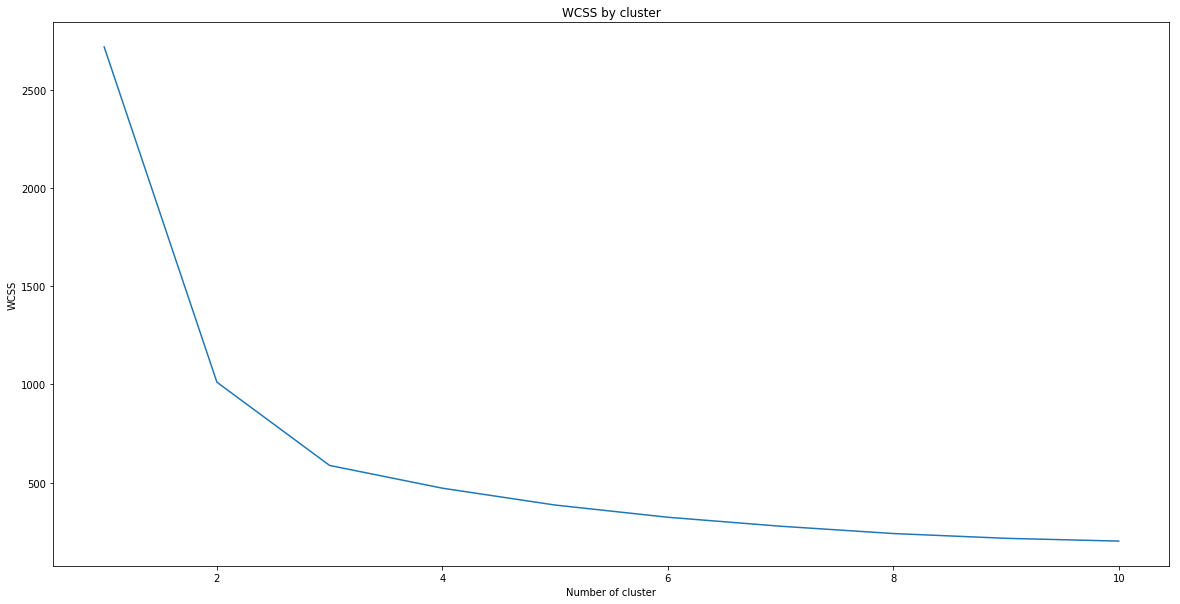

In [22]:
# Create 10 model with K = 1 - 10 cluster
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(features.values)
    wcss.append(kmeans.inertia_) ## inertia give the winthin cluster value
    
plt.figure(figsize=(20, 10))
plt.plot(range(1, 11), wcss)
plt.title('WCSS by cluster')
plt.xlabel('Number of cluster')
plt.ylabel('WCSS')
plt.show()

## K-Means clustering

In [23]:
model = KMeans(n_clusters=3, init='k-means++', n_init=100, max_iter=1000)
print(model)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=3, n_init=100, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)


In [24]:
km_cluster = model.fit_predict(features.values)

In [25]:
km_cluster

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1])

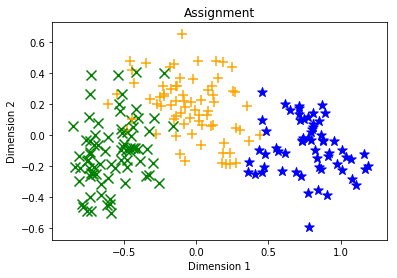

In [26]:
def plot_cluster(samples, cluster):
    col_dict = {0: 'blue', 1: 'green', 2: 'orange'}
    mark_dict = {0: '*', 1: 'x', 2: '+'}
    color = [col_dict[x] for x in cluster]
    marker = [mark_dict[x] for x in cluster]
    
    for sample in range(len(cluster)):
        plt.scatter(samples[sample][0], samples[sample][1], color=color[sample], marker=marker[sample], s=100)
    
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.title('Assignment')
    plt.show()
    
    
plot_cluster(feature_2d, km_cluster)

In [28]:
# Examples with heirarchical clustering
agg_model = AgglomerativeClustering(n_clusters=3)
agg_cluster = agg_model.fit_predict(features.values)
agg_cluster

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2,
       2, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 2, 2, 1, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

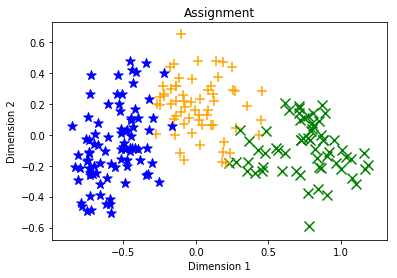

In [29]:
plot_cluster(feature_2d, agg_cluster)